In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [2]:
df = pd.read_pickle('suicide_df.pkl')

In [3]:
df.head()

,Country,Year,Corruption,Population,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Depressive disorders (percentage of population),Anxiety disorders (percentage of population),Bipolar disorder (percentage of population),Eating disorders (percentage of population),Schizophrenia (percentage of population),Attention-deficit/hyperactivity disorder (percentage of population),Conduct disorder (percentage of population),Other disorders (percentage of population),Developmental intellectual disability (percentage of population),Autistic spectrum disorders (percentage of population),"Suicide rate (per 100,000 population)"
0,Afghanistan,2000,1.390000,20093760.0,54.8,321.0,88.0,0.01,10.424960,6532.0,12.2,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5,0.029696,0.040120,0.005830,0.000694,0.000937,0.011535,0.010885,0.011772,0.033036,0.008567,5.7
1,Afghanistan,2005,2.500000,25070798.0,57.3,291.0,85.0,0.02,1.388648,1296.0,14.2,58.0,8.70,58.0,0.1,25.294130,19.3,19.5,0.396,7.9,0.029651,0.040322,0.005893,0.000729,0.000943,0.011579,0.010822,0.011880,0.030955,0.008545,6.3
2,Afghanistan,2010,1.400000,28803167.0,58.8,279.0,74.0,0.01,79.679367,1989.0,16.7,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2,0.029793,0.040746,0.005900,0.000798,0.000963,0.011704,0.011079,0.011920,0.028759,0.008593,5.1
3,Afghanistan,2015,1.100000,33736494.0,65.0,263.0,62.0,0.01,71.279624,1154.0,19.1,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0.031112,0.042413,0.006241,0.000906,0.001018,0.011976,0.011279,0.012532,0.027784,0.008775,4.8
4,Albania,2000,2.978571,3089030.0,72.6,11.0,1.0,3.66,91.711541,662.0,45.0,97.0,6.26,97.0,0.1,1175.788981,2.1,2.2,0.656,10.7,0.021446,0.032947,0.006136,0.000867,0.002036,0.008546,0.009118,0.017761,0.013201,0.008736,5.5


In [4]:
import re

old = list(df.columns)

column_names = []

for column in old:
    column = column.lower()
    column = re.sub("[^a-z \n]", "", column)
    column_names.append(column.strip().replace(' ', '_'))


In [5]:
df.columns = column_names
df.columns

Index(['country', 'year', 'corruption', 'population', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 'hivaids',
       'gdp', 'thinness___years', 'thinness__years',
       'income_composition_of_resources', 'schooling',
       'depressive_disorders_percentage_of_population',
       'anxiety_disorders_percentage_of_population',
       'bipolar_disorder_percentage_of_population',
       'eating_disorders_percentage_of_population',
       'schizophrenia_percentage_of_population',
       'attentiondeficithyperactivity_disorder_percentage_of_population',
       'conduct_disorder_percentage_of_population',
       'other_disorders_percentage_of_population',
       'developmental_intellectual_disability_percentage_of_population',
       'autistic_spectrum_disorders_percentage_of_population',
       'suicide_rate_per__population'],
      dtype='object')

In [6]:
df.corr()

,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
corruption,1.000000,-0.079753,0.481317,-0.275906,-0.055561,0.360064,0.492889,-0.109483,0.247748,0.225259,0.272988,0.217934,-0.110330,0.526273,-0.307956,-0.303608,0.518742,0.511392,0.394940,0.448604,0.463005,0.587166,0.487671,-0.215839,-0.492339,0.487454,-0.434419,-0.185578,0.220495
population,-0.079753,1.000000,0.008070,-0.016516,0.686518,-0.038749,-0.049881,0.476517,-0.135423,0.001683,-0.085677,0.005146,-0.048427,-0.057266,0.295353,0.292599,-0.043280,-0.057109,0.029216,-0.042817,-0.168381,-0.081582,0.265955,-0.092904,-0.101636,0.013417,0.125799,0.037420,0.038209
life_expectancy,0.481317,0.008070,1.000000,-0.666703,-0.132668,0.400168,0.433007,-0.176048,0.568570,0.504253,0.201080,0.489719,-0.541743,0.461517,-0.479514,-0.487631,0.852303,0.795779,0.429423,0.624664,0.691339,0.687041,0.738272,-0.432135,-0.745646,0.796543,-0.814163,-0.025081,0.154932
adult_mortality,-0.275906,-0.016516,-0.666703,1.000000,0.041333,-0.201893,-0.272644,0.066274,-0.358839,-0.282030,-0.107207,-0.264211,0.520744,-0.294302,0.299190,0.328762,-0.508451,-0.442440,-0.205289,-0.418694,-0.459343,-0.462755,-0.488319,0.250332,0.485918,-0.511272,0.516045,-0.010555,0.039459
infant_deaths,-0.055561,0.686518,-0.132668,0.041333,1.000000,-0.076275,0.055866,0.437697,-0.177214,-0.120468,-0.098604,-0.138860,0.006937,-0.004826,0.443372,0.447436,-0.134383,-0.146531,-0.014390,-0.059447,-0.166153,-0.078561,0.018744,-0.106023,0.029982,-0.101538,0.236508,0.019064,0.017087
alcohol,0.360064,-0.038749,0.400168,-0.201893,-0.076275,1.000000,0.390854,-0.021344,0.318736,0.226685,0.298995,0.194393,-0.040107,0.345746,-0.413095,-0.391315,0.526136,0.563028,0.531086,0.390669,0.508762,0.479212,0.476648,-0.208701,-0.572598,0.604967,-0.490974,-0.303018,0.536512
percentage_expenditure,0.492889,-0.049881,0.433007,-0.272644,0.055866,0.390854,1.000000,-0.059102,0.289997,0.196225,0.229948,0.157286,-0.124298,0.793103,-0.300900,-0.302234,0.488778,0.478872,0.325172,0.489133,0.439211,0.595133,0.439605,-0.227528,-0.456168,0.465002,-0.394855,-0.224078,0.173591
measles,-0.109483,0.476517,-0.176048,0.066274,0.437697,-0.021344,-0.059102,1.000000,-0.170072,-0.098656,-0.112823,-0.092346,0.094987,-0.072705,0.230902,0.214292,-0.163731,-0.141258,-0.038446,-0.129160,-0.193860,-0.138477,0.022152,0.046434,0.057348,-0.110175,0.215020,0.006018,0.000062
bmi,0.247748,-0.135423,0.568570,-0.358839,-0.177214,0.318736,0.289997,-0.170072,1.000000,0.305857,0.137304,0.265885,-0.261140,0.326304,-0.515639,-0.527004,0.594728,0.600742,0.371810,0.479488,0.511822,0.471446,0.414140,-0.120363,-0.475843,0.550136,-0.577841,0.057622,0.181714
polio,0.225259,0.001683,0.504253,-0.282030,-0.120468,0.226685,0.196225,-0.098656,0.305857,1.000000,0.083160,0.657029,-0.210977,0.241360,-0.213382,-0.219613,0.464771,0.436554,0.277538,0.297287,0.359546,0.329141,0.382426,-0.271772,-0.407686,0.463419,-0.412961,0.039940,0.186206


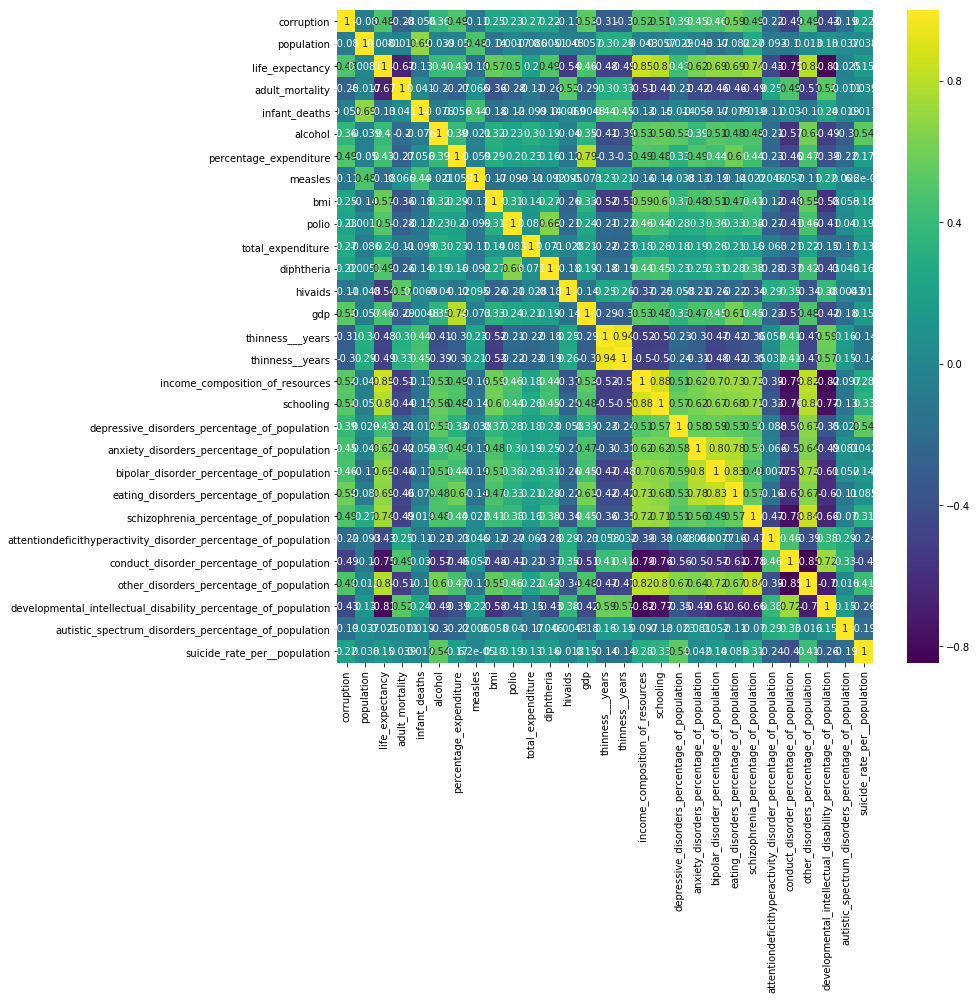

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.columns.tolist()[30]

'suicide_rate_per__population'

In [10]:
# lr = LinearRegression()

# X = pd.DataFrame(df.iloc[:, :9])
# y = df.iloc[:, 10]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# lr.fit(X_train, y_train)

# print(lr.score(X_test, y_test))

In [11]:
df.head()

,country,year,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,1.390000,20093760.0,54.8,321.0,88.0,0.01,10.424960,6532.0,12.2,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5,0.029696,0.040120,0.005830,0.000694,0.000937,0.011535,0.010885,0.011772,0.033036,0.008567,5.7
1,Afghanistan,2005,2.500000,25070798.0,57.3,291.0,85.0,0.02,1.388648,1296.0,14.2,58.0,8.70,58.0,0.1,25.294130,19.3,19.5,0.396,7.9,0.029651,0.040322,0.005893,0.000729,0.000943,0.011579,0.010822,0.011880,0.030955,0.008545,6.3
2,Afghanistan,2010,1.400000,28803167.0,58.8,279.0,74.0,0.01,79.679367,1989.0,16.7,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2,0.029793,0.040746,0.005900,0.000798,0.000963,0.011704,0.011079,0.011920,0.028759,0.008593,5.1
3,Afghanistan,2015,1.100000,33736494.0,65.0,263.0,62.0,0.01,71.279624,1154.0,19.1,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0.031112,0.042413,0.006241,0.000906,0.001018,0.011976,0.011279,0.012532,0.027784,0.008775,4.8
4,Albania,2000,2.978571,3089030.0,72.6,11.0,1.0,3.66,91.711541,662.0,45.0,97.0,6.26,97.0,0.1,1175.788981,2.1,2.2,0.656,10.7,0.021446,0.032947,0.006136,0.000867,0.002036,0.008546,0.009118,0.017761,0.013201,0.008736,5.5


In [12]:
df.shape

(557, 31)

In [13]:
print(df.columns)
print(df.values.shape)

Index(['country', 'year', 'corruption', 'population', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 'hivaids',
       'gdp', 'thinness___years', 'thinness__years',
       'income_composition_of_resources', 'schooling',
       'depressive_disorders_percentage_of_population',
       'anxiety_disorders_percentage_of_population',
       'bipolar_disorder_percentage_of_population',
       'eating_disorders_percentage_of_population',
       'schizophrenia_percentage_of_population',
       'attentiondeficithyperactivity_disorder_percentage_of_population',
       'conduct_disorder_percentage_of_population',
       'other_disorders_percentage_of_population',
       'developmental_intellectual_disability_percentage_of_population',
       'autistic_spectrum_disorders_percentage_of_population',
       'suicide_rate_per__population'],
      dtype='object')
(557, 31)


Plotting all features against target

country


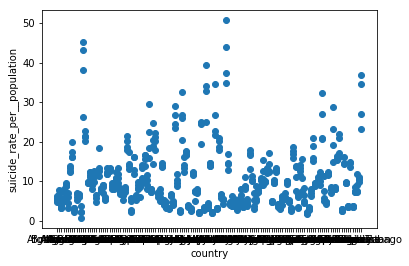

year


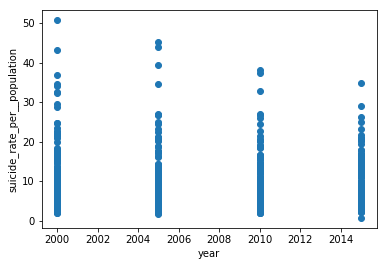

corruption


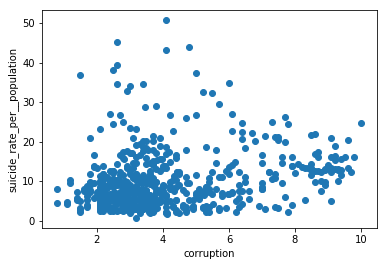

population


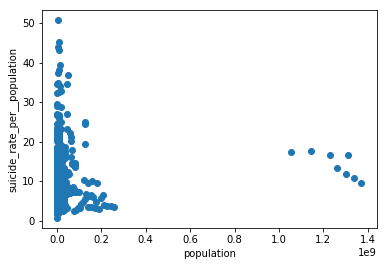

life_expectancy


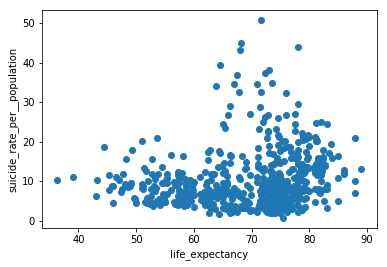

adult_mortality


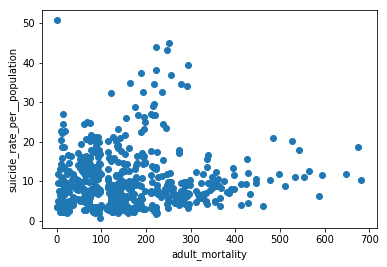

infant_deaths


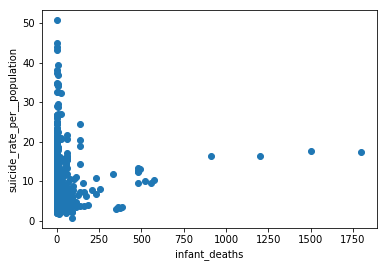

alcohol


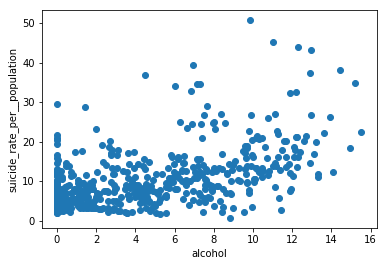

percentage_expenditure


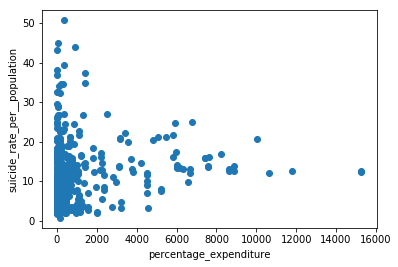

measles


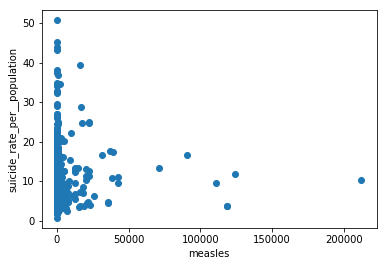

bmi


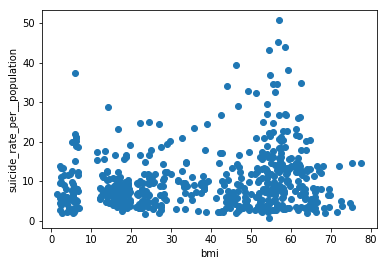

polio


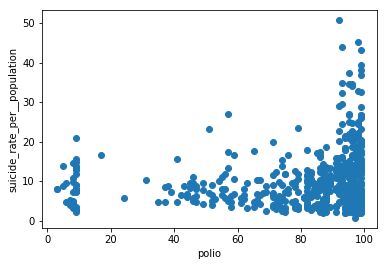

total_expenditure


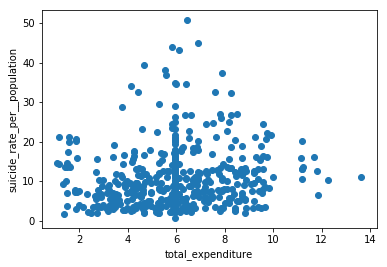

diphtheria


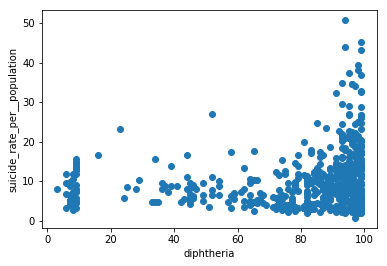

hivaids


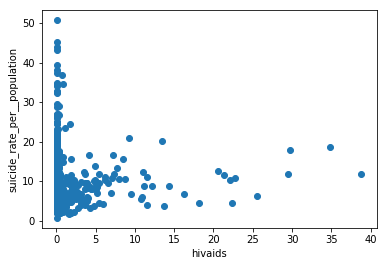

gdp


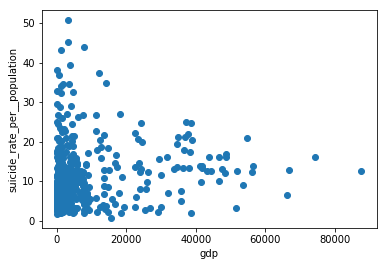

thinness___years


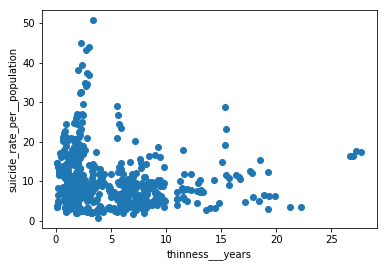

thinness__years


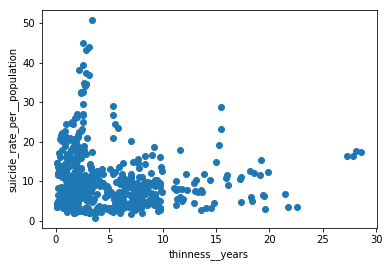

income_composition_of_resources


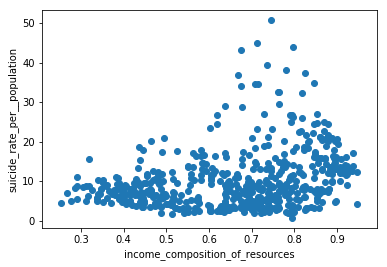

schooling


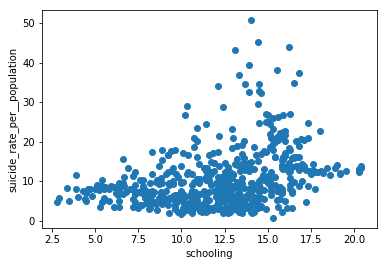

depressive_disorders_percentage_of_population


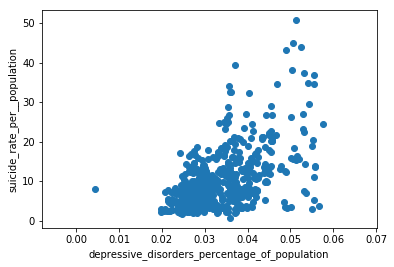

anxiety_disorders_percentage_of_population


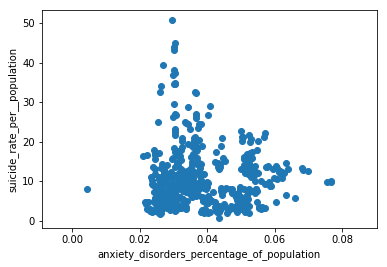

bipolar_disorder_percentage_of_population


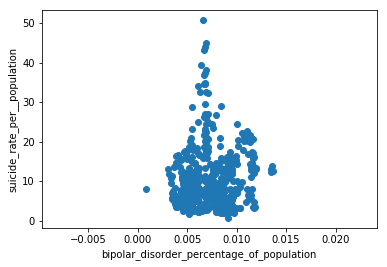

eating_disorders_percentage_of_population


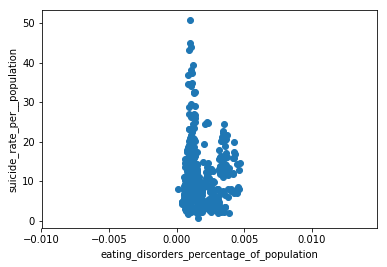

schizophrenia_percentage_of_population


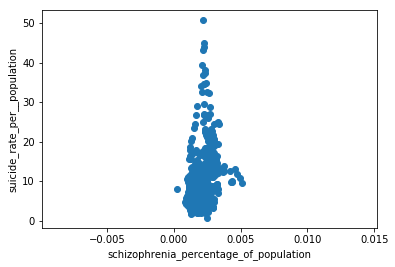

attentiondeficithyperactivity_disorder_percentage_of_population


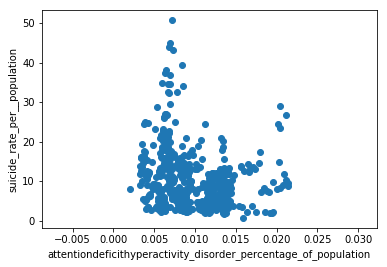

conduct_disorder_percentage_of_population


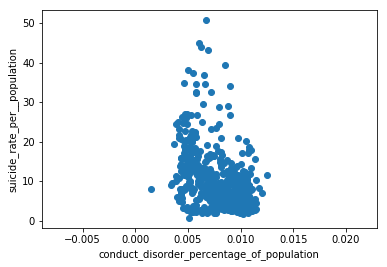

other_disorders_percentage_of_population


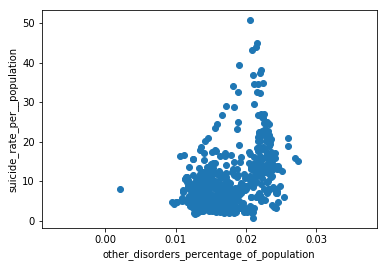

developmental_intellectual_disability_percentage_of_population


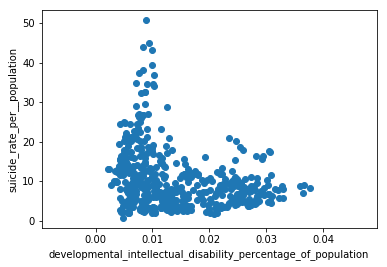

autistic_spectrum_disorders_percentage_of_population


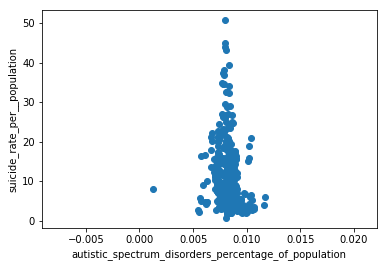

In [14]:
for i in range(df.shape[1]-1):
    try:
        print(df.columns[i])
        plt.scatter(df.iloc[:, i], df.iloc[:, 30])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[30])
        plt.show()
    except:
        pass

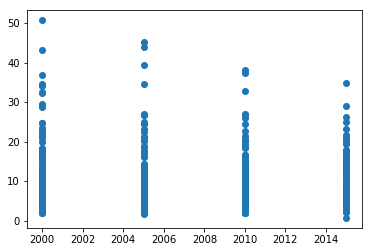

In [15]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 30])

In [16]:
df.columns[0]

'country'

Taking a closer look at some features

(0, 0.015)

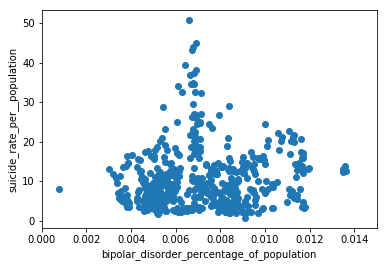

In [17]:
plt.scatter(df.iloc[:, 22], df.iloc[:, 30])
plt.xlabel(df.columns[22])
plt.ylabel(df.columns[30])
plt.xlim(0, 0.015)

(-0.0005, 0.005)

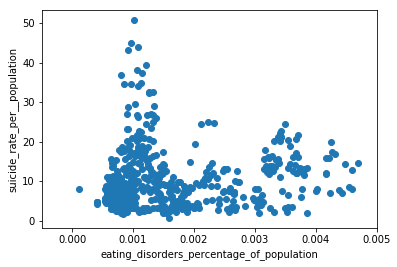

In [18]:
plt.scatter(df.iloc[:, 23], df.iloc[:, 30])
plt.xlabel(df.columns[23])
plt.ylabel(df.columns[30])
plt.xlim(-0.0005, 0.005)

(0, 0.0055)

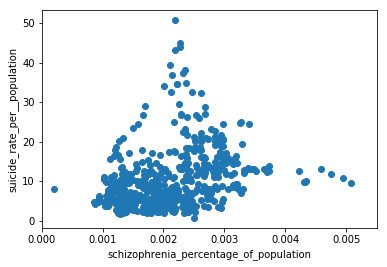

In [19]:
plt.scatter(df.iloc[:, 24], df.iloc[:, 30])
plt.xlabel(df.columns[24])
plt.ylabel(df.columns[30])
plt.xlim(0, 0.0055)

(0.002, 0.023)

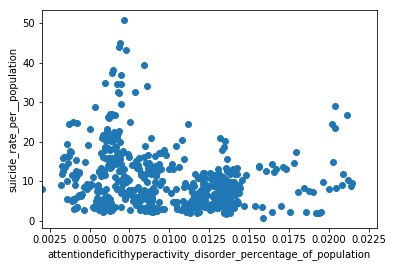

In [20]:
plt.scatter(df.iloc[:, 25], df.iloc[:, 30])
plt.xlabel(df.columns[25])
plt.ylabel(df.columns[30])
plt.xlim(0.002, 0.023)

(0.003, 0.013)

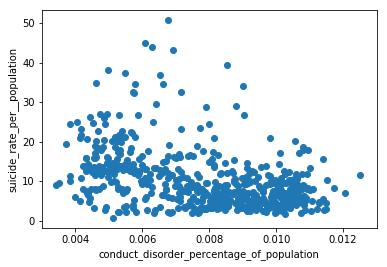

In [21]:
plt.scatter(df.iloc[:, 26], df.iloc[:, 30])
plt.xlabel(df.columns[26])
plt.ylabel(df.columns[30])
plt.xlim(0.003, 0.013)

(0.009, 0.03)

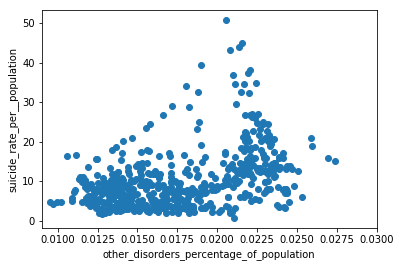

In [22]:
plt.scatter(df.iloc[:, 27], df.iloc[:, 30])
plt.xlabel(df.columns[27])
plt.ylabel(df.columns[30])
plt.xlim(0.009, 0.03)

(0.0005, 0.04)

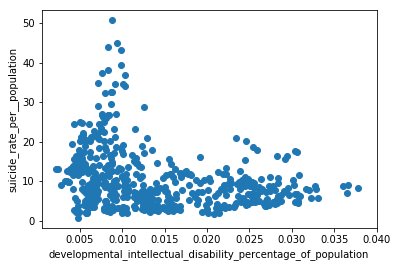

In [23]:
plt.scatter(df.iloc[:, 28], df.iloc[:, 30])
plt.xlabel(df.columns[28])
plt.ylabel(df.columns[30])
plt.xlim(0.0005, 0.04)

(0.005, 0.012)

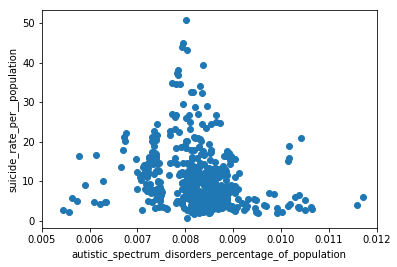

In [24]:
plt.scatter(df.iloc[:, 29], df.iloc[:, 30])
plt.xlabel(df.columns[29])
plt.ylabel(df.columns[30])
plt.xlim(0.005, 0.012)

In [25]:
df.columns

Index(['country', 'year', 'corruption', 'population', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 'hivaids',
       'gdp', 'thinness___years', 'thinness__years',
       'income_composition_of_resources', 'schooling',
       'depressive_disorders_percentage_of_population',
       'anxiety_disorders_percentage_of_population',
       'bipolar_disorder_percentage_of_population',
       'eating_disorders_percentage_of_population',
       'schizophrenia_percentage_of_population',
       'attentiondeficithyperactivity_disorder_percentage_of_population',
       'conduct_disorder_percentage_of_population',
       'other_disorders_percentage_of_population',
       'developmental_intellectual_disability_percentage_of_population',
       'autistic_spectrum_disorders_percentage_of_population',
       'suicide_rate_per__population'],
      dtype='object')

In [34]:
def create_patsy_matrix (column_list):
    string = 'suicide_rate_per__population ~ '
    for column in column_list[:-1]:
        string += column + ' + '
    
    return string[:-2]

In [35]:
create_patsy_matrix(df.columns)

'suicide_rate_per__population ~ country + year + corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population '

OLS Base Model

F stat is 

In [37]:
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population ', data=df, return_type="dataframe")


model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.610
Model:                                      OLS   Adj. R-squared:                  0.589
Method:                           Least Squares   F-statistic:                     29.47
Date:                          Wed, 17 Apr 2019   Prob (F-statistic):           1.44e-89
Time:                                  13:01:18   Log-Likelihood:                -1644.2
No. Observations:                           557   AIC:                             3346.
Df Residuals:                               528   BIC:                             3472.
Df Model:                                    28                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           8.7052      4.888      1.781      0.076      -0.897      18.308
corruption                                                          0.4119      0.134      3.073      0.002       0.149       0.675
population                                                       2.932e-09   2.45e-09      1.195      0.233   -1.89e-09    7.75e-09
life_expectancy                                                    -0.2116      0.063     -3.343      0.001      -0.336      -0.087
adult_mortality                                                     0.0075      0.002      3.144      0.002       0.003       0.012
infant_deaths                                                       0.0002      0.002      0.091      0.928      -0.005       0.005
alcohol                                                             0.5796      0.077      7.546      0.000       0.429       0.731
percentage_expenditure                                              0.0003      0.000      1.609      0.108   -6.62e-05       0.001
measles                                                         -1.189e-05   1.58e-05     -0.750      0.454    -4.3e-05    1.92e-05
bmi                                                                 0.0207      0.014      1.482      0.139      -0.007       0.048
polio                                                               0.0117      0.011      1.043      0.297      -0.010       0.034
total_expenditure                                                  -0.0264      0.111     -0.238      0.812      -0.245       0.192
diphtheria                                                          0.0048      0.011      0.424      0.672      -0.017       0.027
hivaids                                                            -0.2024      0.065     -3.111      0.002      -0.330      -0.075
gdp                                                             -9.071e-07    2.9e-05     -0.031      0.975   -5.79e-05    5.61e-05
thinness___years                                                    0.2821      0.137      2.053      0.041       0.012       0.552
thinness__years                                                    -0.1362      0.135     -1.006      0.315      -0.402       0.130
income_composition_of_resources                                     0.5291      3.385      0.156      0.876      -6.121       7.179
schooling                                                           0.0669      0.149      0.450      0.653      -0.225       0.359
depressive_disorders_percentage_of_population                     472